# Author Identification using bi-directional LSTM

## Introduction

Author identification is an important topic in the field of Natural Language Processing (NLP). With its help, we can identify the author of a text, article, news and it can help us detect plagiarism, literary theft and identify anonymous authors to help researchers with attributions. In this project, we made use of generative probabilistic and discriminative neural network models on Reuters 50 50 and Gutenberg dataset. In the two approaches, article-level LSTM achieved the best accuracy of 68.8\% for Reuters 50 50 dataset and 79.28\% for Gutneberg dataset. 

Authorship identification is the process of identifying the author of a piece of text using various Natural Language Processing methods. The process involves decoding the pattern and style of writing of an author and using that to identify the original author. The writing style is to an extent irrelevant to the topics in question but the style helps distinguish one author from another by a human reader.  

One of the applications of author identification is to match an anonymous text with its potential author. It can also be used to detect plagiarism and resolve the rising threat to writing posed by AI systems like the latest ChatGPT. Researchers will benefit by being able to identify and cite text from unknown sources. 

## Motivation and Importance of the Problem

Lately, there have been concerns about the misuse of literary rights, literary theft, and plagiarism. Using someone else's work without proper attribution has become commonplace, especially after the advent of blogging and social media. The author Identification process is important to determine the authors of the text and make sure they receive the recognition and attribution they deserve. The system created in the project enables the analysis and discovery of the original author from unstructured and unannotated text.  The project focuses on generative probabilistic and discriminative neural network designs to predict the author's name. 

Among all the research done in authorship analysis, authorship identification has been researched in prevalence and is arguably the most published work of all. The author identification was done with classical statistical methods and then with other machine learning algorithms like SVM (Support Vector Machines), tree-based algorithms, etc. Recent advancements in information retrieval and deep learning have made possible the implementation of complex neural network systems like LSTM (Long short-term memory networks), RNN (Recurrent Neural Network), and BERT (Bidirectional Encoder Representations from Transformers) for author identification tasks. The most recent research focuses on recent deep learning architectures combined with state-of-the-art vector representations of words.

## Details of the project

The project involves exploring a Generative Probabilistic Model and Discriminative Neural Network Model for author identification on Reuters 50 50 and Gutenberg dataset. Their performances are compared on the real dataset and also on a synthetic dataset created using the Generative Probabilistic Model. 

The following subsections elaborate on the data used for the project and the word representation used in the project. It is followed by a description of the two modeling approaches used: Generative Probabilistic Modelling and Discriminative Neural Network Modelling. 

## Datasets 

The project is implemented with two datasets, Reuters 50 50 news dataset, and Gutenberg digital archive dataset. The first one is widely used in research for author identification and we created the second dataset by scraping text from Gutenberg digital archive available to use under Project Gutenberg License. These datasets were used to train and test our model and the results of our experimentations have been discussed in the next section. 

1. Reuters 50 50

The dataset was obtained from UCI Machine Learning Repository and is a subset of a larger corpus, RCV1. The dataset contains news pieces from the top 50 authors, with respect to the total size of articles. The articles written by these top 50 authors were present in train and test folders, each containing half of the total text. The train and test folders have 2500 articles, having around 44,000 sentences in total. The dataset is combined to create stratified randomly shuffled test and train datasets in the ratio 80:20. 

2. Gutenberg

The Gutenberg dataset was created by us from the text offered by Project Gutenberg. Project Gutenberg hosts over 53,000 free e-books which can be used for non-commercial purposes. We selected books by 12 authors of our choice and chose 18 texts in total with each author having at least one text and a maximum of 3 texts. The texts in total have around 202548 sentences. While scraping the dataset, we manually reduced noise in the texts by removing page numbers, index, and contributor details. The test and train datasets were created by stratified random shuffling and splitting in an 80:20 ratio. 

## Model: Discriminative Neural Network Model (bi-directional LSTM)

Discriminative models work by differentiating one author's writing style from another without learning the writing style of all the authors. Unlike generative models that use the underlying class-conditional probability distributions and prior distributions to create the model, discriminative models directly model the conditional probability of the output given the input data. Some examples of discriminative models are logistics regression, support vector machines, etc. For the project, I make use of an Article-level LSTM(Long short-term memory networks). 

The idea behind this model is to capture an author’s writing style at the article level. The article-level LSTM takes paragraphs as the input and predicts its author. Therefore, the input unit is a sentence. At each time stamp, an average of a sentence's words' vectors is sent to an LSTM layer. The hidden state will be updated and an output will be produced upon each input. All the outputs from the LSTM layers are then sent to an average pooling layer and the next layer is the softmax classification layer. The final output is the author identified by the model. 

## Reuters 50 50 dataset

In [1]:
#importing all the libraries required for analysis

import numpy as np
import pandas as pd
import glob, csv
from sklearn.model_selection import StratifiedShuffleSplit
from tqdm import trange

from torchtext import vocab
from torchtext.vocab import GloVe
import torch
from torchtext.legacy import data

import warnings
warnings.filterwarnings("ignore")

In [41]:
#creating a train dataframe to get the author's names and text from each file in the C50 dataset

train_df = pd.DataFrame()
df = pd.DataFrame()
for _, filepath in enumerate(glob.iglob('/Users/srtpan/Downloads/C50/C50train/*/*.txt')):
    df = pd.read_csv(filepath, delimiter="\t", header = None, error_bad_lines=False, quoting = csv.QUOTE_NONE, encoding='utf-8')
    df['Author'] = filepath.split("/")[6]
    dataframe = [train_df, df]
    train_df = pd.concat(dataframe)
    
train_df.rename(columns={ 0 : 'Text'}, inplace=True)

b'Skipping line 27: expected 1 fields, saw 7\nSkipping line 28: expected 1 fields, saw 7\nSkipping line 29: expected 1 fields, saw 4\nSkipping line 30: expected 1 fields, saw 8\nSkipping line 31: expected 1 fields, saw 6\nSkipping line 32: expected 1 fields, saw 6\nSkipping line 33: expected 1 fields, saw 6\n'
b'Skipping line 23: expected 1 fields, saw 8\nSkipping line 24: expected 1 fields, saw 6\nSkipping line 25: expected 1 fields, saw 4\nSkipping line 27: expected 1 fields, saw 6\nSkipping line 28: expected 1 fields, saw 5\nSkipping line 29: expected 1 fields, saw 6\n'
b'Skipping line 25: expected 1 fields, saw 8\nSkipping line 26: expected 1 fields, saw 6\nSkipping line 27: expected 1 fields, saw 4\nSkipping line 28: expected 1 fields, saw 7\nSkipping line 29: expected 1 fields, saw 6\nSkipping line 30: expected 1 fields, saw 5\nSkipping line 31: expected 1 fields, saw 6\n'
b'Skipping line 21: expected 1 fields, saw 7\nSkipping line 22: expected 1 fields, saw 5\nSkipping line 23: 

b'Skipping line 16: expected 1 fields, saw 4\nSkipping line 17: expected 1 fields, saw 4\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 20: expected 1 fields, saw 3\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 5\nSkipping line 23: expected 1 fields, saw 3\nSkipping line 24: expected 1 fields, saw 4\n'
b'Skipping line 18: expected 1 fields, saw 4\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 20: expected 1 fields, saw 2\nSkipping line 22: expected 1 fields, saw 3\nSkipping line 23: expected 1 fields, saw 2\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 2\n'


In [42]:
#displaying first 5 rows of the dataframe

train_df.head()

,Text,Author
0,Drugstore giant Revco D.S. Inc. said Monday it...,RobinSidel
1,"The transaction calls for Twinsburg, Ohio-base...",RobinSidel
2,"""We are very excited about the combination of ...",RobinSidel
3,The deal will combine the nation's second- and...,RobinSidel
4,The companies said Big B's board of directors ...,RobinSidel


In [43]:
#some more information about the train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43382 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    43382 non-null  object
 1   Author  43382 non-null  object
dtypes: object(2)
memory usage: 1016.8+ KB


In [44]:
#top five authors having maximum number of texts 

train_df["Author"].value_counts()[0:5]

LynneO'Donnell      1108
SarahDavison        1013
NickLouth           1012
JaneMacartney        988
HeatherScoffield     987
Name: Author, dtype: int64

In [45]:
#creating a test dataframe to get the author's names and text from each file in the C50 dataset

test_df = pd.DataFrame()
df = pd.DataFrame()
for _, filepath in enumerate(glob.iglob('/Users/srtpan/Downloads/C50/C50test/*/*.txt')):
    df = pd.read_csv(filepath, delimiter="\t", header = None, error_bad_lines=False, quoting = csv.QUOTE_NONE, encoding='utf-8')
    df['Author'] = filepath.split("/")[6]
    dataframe = [test_df, df]
    test_df = pd.concat(dataframe)
    
test_df.rename(columns={ 0 : 'Text'}, inplace=True)

b'Skipping line 16: expected 1 fields, saw 4\nSkipping line 17: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 20: expected 1 fields, saw 5\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 2\n'
b'Skipping line 12: expected 1 fields, saw 2\n'
b'Skipping line 18: expected 1 fields, saw 7\nSkipping line 19: expected 1 fields, saw 4\nSkipping line 20: expected 1 fields, saw 4\nSkipping line 21: expected 1 fields, saw 6\nSkipping line 22: expected 1 fields, saw 5\n'
b'Skipping line 19: expected 1 fields, saw 7\nSkipping line 20: expected 1 fields, saw 5\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 6\nSkipping line 23: expected 1 fields, saw 3\n'
b'Skipping line 28: expected 1 fields, saw 7\nSkipping line 29: expected 1 fields, saw 7\nSkipping line 30: expected 1 fields, saw 3\nSkipping line 31: expected 1 fields, saw 7\nSkipping line 32: expected 1 fields, saw 6\nSkipping line 

b'Skipping line 10: expected 1 fields, saw 5\nSkipping line 11: expected 1 fields, saw 5\nSkipping line 12: expected 1 fields, saw 4\nSkipping line 13: expected 1 fields, saw 3\nSkipping line 14: expected 1 fields, saw 4\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 4\nSkipping line 17: expected 1 fields, saw 3\nSkipping line 18: expected 1 fields, saw 2\nSkipping line 19: expected 1 fields, saw 5\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 3\nSkipping line 23: expected 1 fields, saw 9\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 25: expected 1 fields, saw 9\nSkipping line 26: expected 1 fields, saw 4\nSkipping line 27: expected 1 fields, saw 9\nSkipping line 28: expected 1 fields, saw 9\n'
b'Skipping line 11: expected 1 fields, saw 2\n'


In [46]:
#first five elements of test dataframe 

test_df.head()

,Text,Author
0,ITT Corp. met with financial advisers on Thurs...,RobinSidel
1,Industry experts said ITT might be able to sta...,RobinSidel
2,"""ITT is a company with a lot of friends on Wal...",RobinSidel
3,Although ITT is widely expected to reject the ...,RobinSidel
4,ITT declined to comment.,RobinSidel


In [47]:
# getting more information about the test dataset

test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44010 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    44010 non-null  object
 1   Author  44010 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [48]:
#top five authors having maximum number of texts 

test_df["Author"].value_counts()[0:5]

LynneO'Donnell      1088
KirstinRidley       1068
DarrenSchuettler    1065
LynnleyBrowning     1049
PeterHumphrey       1045
Name: Author, dtype: int64

In [49]:
#combining both dataset

c50_df=train_df.append(test_df, ignore_index=True)
c50_df = c50_df.drop_duplicates()
c50_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78408 entries, 0 to 87391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    78408 non-null  object
 1   Author  78408 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [50]:
c50_df["Author"].value_counts()[0:5]

MatthewBunce       1951
LynnleyBrowning    1925
PeterHumphrey      1924
LynneO'Donnell     1884
SarahDavison       1878
Name: Author, dtype: int64

### Test-Train split 

For this, we will use Stratified ShuffleSplit cross-validator provided in scikit-learn library. It provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

In [51]:
#defining X and y, the independent and depenedent variable

def train_test_split(dataframe):
    X=dataframe['Text']
    y=dataframe['Author_Num']

  #using the stratfiedshufflesplit

    split=StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=9)
    split.get_n_splits(X, y)

  #creating the test and train dataframes using the stratifiedshufflesplit module

    for i, (train_index, test_index) in enumerate(split.split(X, y)):
        train=dataframe.iloc[train_index,:]
        test=dataframe.iloc[test_index,:]

In [52]:
# starting by creating a new column for the dataframe representing authors as numbers 

author_number = sorted(c50_df['Author'].unique())
dictOfAuthors = { i : author_number[i] for i in range(0, len(author_number) ) }
dict_num = {value:key for key, value in dictOfAuthors.items()}
c50_df['Author_Num'] = c50_df['Author'].map(dict_num)

#dropping author_num

c50_df.drop(columns="Author", inplace=True)
c50_df.head()

,Text,Author_Num
0,Drugstore giant Revco D.S. Inc. said Monday it...,39
1,"The transaction calls for Twinsburg, Ohio-base...",39
2,"""We are very excited about the combination of ...",39
3,The deal will combine the nation's second- and...,39
4,The companies said Big B's board of directors ...,39


In [53]:
#using the FastText word embedding system as mentioned in the paper 

from torchtext.legacy.data import Field

text_field = Field(
    sequential=True,
    tokenize='basic_english', 
    fix_length=5,
    lower=True
)
label_field = Field(sequential=False, use_vocab=False)

preprocessed_text = c50_df['Text'].apply(
    lambda x: text_field.preprocess(x)
)

text_field.build_vocab(
    preprocessed_text, 
    vectors='fasttext.simple.300d'
)

# getting the vocab instance
vocab = text_field.vocab

In [54]:
vocab.vectors

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0569, -0.0520,  0.2733,  ..., -0.0695, -0.1606, -0.0989],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [55]:
from torchtext.legacy.data import Dataset, Example

ltoi = {l: i for i, l in enumerate(c50_df['Author_Num'].unique())}
c50_df['Author_Num'] = c50_df['Author_Num'].apply(lambda y: ltoi[y])

#create a new class to split into train and test and create iterators
class DataFrameDataset(Dataset):
    def __init__(self, df: pd.DataFrame, fields: list):
        super(DataFrameDataset, self).__init__(
            [
                Example.fromlist(list(r), fields) 
                for i, r in df.iterrows()
            ], 
            fields
        )

In [56]:
#80:20 split as mentioned in the paper

train_dataset, test_dataset = DataFrameDataset(
    df=c50_df, 
    fields=(
        ('text', text_field),
        ('label', label_field)
    )
).split()

In [57]:
#creating iterators for further training and test the model 

from torchtext.legacy.data import BucketIterator
train_iter, test_iter = BucketIterator.splits(
    datasets=(train_dataset, test_dataset), 
    batch_size=128,
    sort=False
)

In [58]:
#creating the deep neural network model

import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

#defining parameters

class ModelParam(object):
    def __init__(self, param_dict: dict = dict()):
        self.input_size = param_dict.get('input_size', 0)
        self.vocab_size = param_dict.get('vocab_size')
        self.hidden_size = param_dict.get('hidden_size')
        self.embedding_dim = param_dict.get('embedding_dim', 300)
        self.target_dim = param_dict.get('target_dim', 50)
        self.n_neurons=param_dict.get('n_neurons',30)
        self.batch_size=param_dict.get('batch_size',64)
        self.num_layers=param_dict.get('num_layers',30)

#bidirectional LSTM 
    
class MyModel(nn.Module):
    def __init__(self, model_param: ModelParam):
        super().__init__()
        self.embedding = nn.Embedding(
            model_param.vocab_size, 
            model_param.embedding_dim
        )
        self.lstm = nn.LSTM(model_param.embedding_dim,model_param.hidden_size, bidirectional=True, batch_first=True)
        self.linear=nn.Linear(model_param.hidden_size*4,model_param.batch_size)
        self.lin = nn.Linear(model_param.batch_size, 
            model_param.target_dim
        )
        
    def forward(self, x):
        features = self.embedding(x)
        h_lstm, _ = self.lstm(features)
        avg_pool=torch.mean(h_lstm,1)
        max_pool= torch.mean(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.linear(conc)
        out = self.lin(conc)
        return out

In [59]:
#a function to get accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

#modelling function by varying hidden size
def modelling(h_size):
    model_param = ModelParam(
        param_dict=dict(
            vocab_size=len(text_field.vocab),
            input_size=5,
            hidden_size=h_size
        )
    )
    model = MyModel(model_param)
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    epochs = 25
    
    test_acc=[]
    epoch_num=[]
    train_acc=[]
    for epoch in range(epochs):
        epoch_num.append(epoch)
        test_accuracy=0.0
        train_accuracy=0.0

        epoch_losses = list()
        for i,batch in enumerate(train_iter):
            optimizer.zero_grad()

            prediction = model(batch.text.T)
            loss = loss_function(prediction, batch.label)

            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            train_accuracy += get_accuracy(prediction, batch.label, 128)

        test_losses = list()
        for j,batch in enumerate(test_iter):
            with torch.no_grad():
                optimizer.zero_grad()
                prediction = model(batch.text.T)
                loss = loss_function(prediction, batch.label)

                test_losses.append(loss.item())
                test_accuracy += get_accuracy(prediction, batch.label, 128)

        test_acc.append(test_accuracy/j)
        train_acc.append(train_accuracy/i)
        
    return epoch_num, test_acc, train_acc

In [60]:
epoch_50, train_acc_50, test_acc_50=modelling(50)
epoch_100, train_acc_100, test_acc_100=modelling(100)
epoch_150, train_acc_150, test_acc_150=modelling(150)
epoch_300, train_acc_300, test_acc_300=modelling(300)

In [61]:
epoch_num=[i+1 for i in epoch_50]

In [62]:
df_plotting = pd.DataFrame(list(zip(epoch_num, test_acc_50, test_acc_100, test_acc_150, test_acc_300)), index =epoch_50,
                                              columns =['Epoch','h=50','h=100','h=150','h=300'])

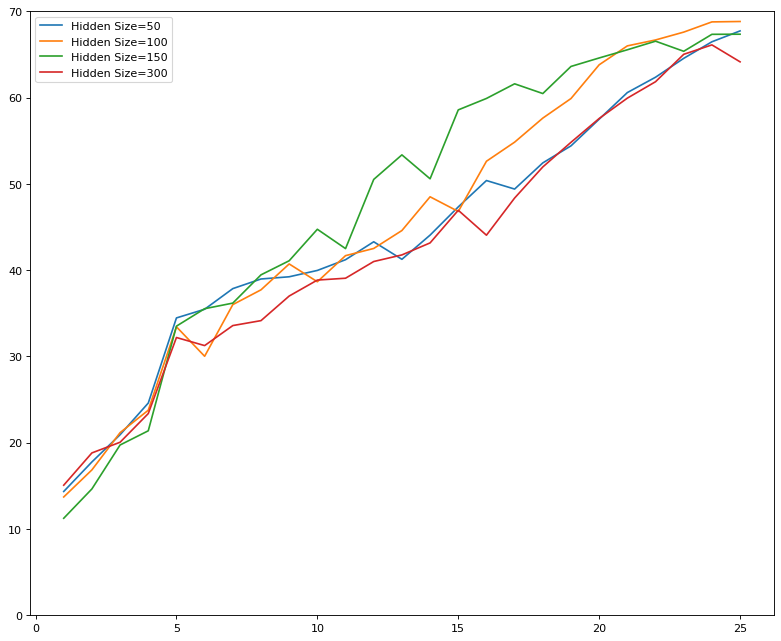

In [63]:
#plot showing different test accuracy values as the hidden size is changed 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)
  
'h=50','h=100','h=150','h=300'
plt.plot(df_plotting["Epoch"],df_plotting['h=50'] , label = "Hidden Size=50")
plt.plot(df_plotting["Epoch"], df_plotting['h=100'], label = "Hidden Size=100")
plt.plot(df_plotting["Epoch"], df_plotting['h=150'], label = "Hidden Size=150")
plt.plot(df_plotting["Epoch"], df_plotting['h=300'], label = "Hidden Size=300")
plt.ylim(0,70)
plt.legend()
plt.savefig('Deep Neural Network Experiments')
plt.show()

## Gutenberg dataset

In [2]:
#creating a train dataframe to get the author's names and text from each file in the C50 dataset

gutenberg = pd.DataFrame()
df = pd.DataFrame()
for _, filepath in enumerate(glob.iglob('Gutenberg/*/*.txt')):
    df = pd.read_csv(filepath, delimiter="\t", header = None, error_bad_lines=False, quoting = csv.QUOTE_NONE, encoding='ISO-8859-1')
    df['Author'] = filepath.split("/")[1]
    dataframe = [gutenberg, df]
    gutenberg = pd.concat(dataframe)
    
gutenberg.rename(columns={ 0 : 'Text'}, inplace=True)
gutenberg['Text'].nunique()

202548

# Data Pre-Processing

In order to perform a classification task and checking how acurate our model is, we need to encode the text which is interpretable by the computer. This encoding depends on the model we want to use. We will start with discriminative neural network model and use the strategy described in paper: https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1174/reports/2760185.pdf

## Word Representations 

The authors used GloVe word vectors of size 50 as the pretrained word embeddings. The GloVe vectors were then used to initialize the word embeddings and the gradient are propagated tp the embeddings. 


In [3]:
# starting by creating a new column for the dataframe representing authors as numbers 

author_number = sorted(gutenberg['Author'].unique())
dictOfAuthors = { i : author_number[i] for i in range(0, len(author_number) ) }
dict_num = {value:key for key, value in dictOfAuthors.items()}
gutenberg['Author_Num'] = gutenberg['Author'].map(dict_num)

#dropping author_num

gutenberg.drop(columns="Author", inplace=True)
gutenberg.head()

,Text,Author_Num
0,[Persuasion by Jane Austen 1818],2
1,Chapter 1,2
2,"Sir Walter Elliot, of Kellynch Hall, in Somers...",2
3,"for his own amusement, never took up any book ...",2
4,"there he found occupation for an idle hour, an...",2


In [4]:
#using the GloVe word embedding system as mentioned in the paper 

from torchtext.vocab import GloVe
from torchtext.legacy.data import Field

text_field = Field(
    sequential=True,
    tokenize='basic_english', 
    fix_length=5,
    lower=True
)
label_field = Field(sequential=False, use_vocab=False)

preprocessed_text = gutenberg['Text'].apply(
    lambda x: text_field.preprocess(x)
)

text_field.build_vocab(
    preprocessed_text, 
    vectors='fasttext.simple.300d'
)

# getting the vocab instance
vocab = text_field.vocab

In [5]:
vocab.vectors

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2013,  0.0104,  0.1623,  ..., -0.0931, -0.1408, -0.1326],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.2399, -0.3645, -0.0732,  ...,  0.1944, -0.5970,  0.2444]])

In [6]:
from torchtext.legacy.data import Dataset, Example

ltoi = {l: i for i, l in enumerate(gutenberg['Author_Num'].unique())}
gutenberg['Author_Num'] = gutenberg['Author_Num'].apply(lambda y: ltoi[y])

#create a new class to split into train and test and create iterators
class DataFrameDataset(Dataset):
    def __init__(self, df: pd.DataFrame, fields: list):
        super(DataFrameDataset, self).__init__(
            [
                Example.fromlist(list(r), fields) 
                for i, r in df.iterrows()
            ], 
            fields
        )

In [7]:
#90:10 split as mentioned in the paper

train_dataset, test_dataset = DataFrameDataset(
    df=gutenberg, 
    fields=(
        ('text', text_field),
        ('label', label_field)
    )
).split()

In [8]:
#creating iterators for further training and test the model 

from torchtext.legacy.data import BucketIterator
train_iter, test_iter = BucketIterator.splits(
    datasets=(train_dataset, test_dataset), 
    batch_size=128,
    sort=False
)

In [9]:
#creating the deep neural network model

import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

#defining parameters

class ModelParam(object):
    def __init__(self, param_dict: dict = dict()):
        self.input_size = param_dict.get('input_size', 0)
        self.vocab_size = param_dict.get('vocab_size')
        self.hidden_size = param_dict.get('hidden_size')
        self.embedding_dim = param_dict.get('embedding_dim', 300)
        self.target_dim = param_dict.get('target_dim', 50)
        self.n_neurons=param_dict.get('n_neurons',30)
        self.batch_size=param_dict.get('batch_size',64)
        self.num_layers=param_dict.get('num_layers',30)

#bidirectional LSTM 
    
class MyModel(nn.Module):
    def __init__(self, model_param: ModelParam):
        super().__init__()
        self.embedding = nn.Embedding(model_param.vocab_size, model_param.embedding_dim)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(model_param.embedding_dim,model_param.hidden_size, bidirectional=True, batch_first=True)
        self.linear=nn.Linear(model_param.hidden_size*4,model_param.batch_size)
        self.lin = nn.Linear(model_param.batch_size, model_param.target_dim)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        features = self.embedding(x)
        h_lstm, _ = self.lstm(features)
        avg_pool=torch.mean(h_lstm,1)
        max_pool,_= torch.max(h_lstm, 1)
        conc = torch.cat(( avg_pool, max_pool), 1)
        conc = self.linear(conc)
        lin_output = self.lin(conc)
        out=self.softmax(lin_output)
        
        return out

In [10]:
#a function to get accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

#modelling function by varying hidden size
def modelling(h_size):
    model_param = ModelParam(
        param_dict=dict(
            vocab_size=len(text_field.vocab),
            input_size=5,
            hidden_size=h_size
        )
    )
    model = MyModel(model_param)
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    epochs = 25
    
    test_acc=[]
    epoch_num=[]
    train_acc=[]
    for epoch in range(epochs):
        epoch_num.append(epoch)
        test_accuracy=0.0
        train_accuracy=0.0

        epoch_losses = list()
        for i,batch in enumerate(train_iter):
            optimizer.zero_grad()

            prediction = model(batch.text.T)
            loss = loss_function(prediction, batch.label)

            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            train_accuracy += get_accuracy(prediction, batch.label, 128)

        test_losses = list()
        for j,batch in enumerate(test_iter):
            with torch.no_grad():
                optimizer.zero_grad()
                prediction = model(batch.text.T)
                loss = loss_function(prediction, batch.label)

                test_losses.append(loss.item())
                test_accuracy += get_accuracy(prediction, batch.label, 128)

        
        train_acc.append(train_accuracy/i)
        test_acc.append(test_accuracy/j)
        
    return epoch_num, test_acc, train_acc

In [18]:
epoch_50, test_50, train_50=modelling(50)
epoch_50, test_50, train_50=modelling(100)
epoch_50, test_50, train_50=modelling(150)
epoch_50, test_50, train_50=modelling(300)

In [ ]:
epoch_num=[i+1 for i in epoch_50]

In [23]:
df_plotting = pd.DataFrame(list(zip(epoch_num, test_50, test_100, test_150, test_300)), index =epoch_50,
                                              columns =['Epoch','h=50','h=100','h=150','h=300'])

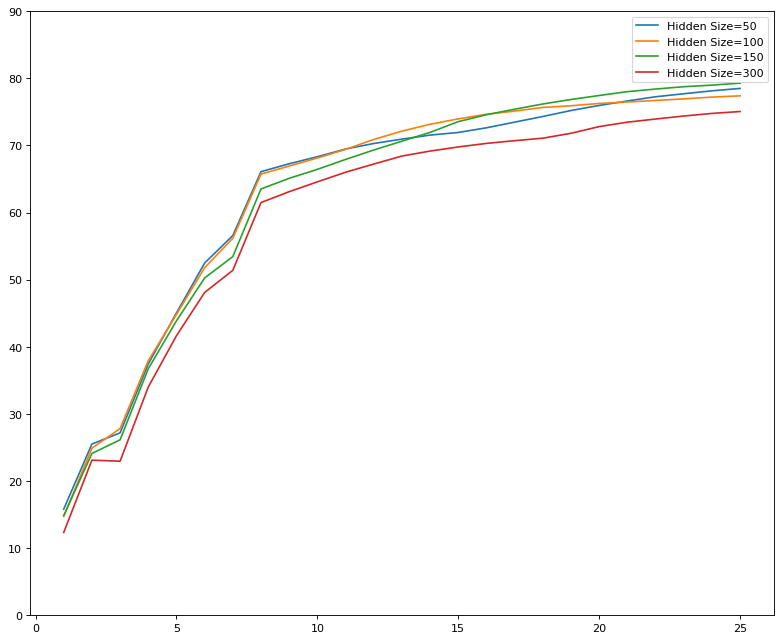

In [40]:
#plot showing different test accuracy values as the hidden size is changed 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)
  
'h=50','h=100','h=150','h=300'
plt.plot(df_plotting["Epoch"],df_plotting['h=50'] , label = "Hidden Size=50")
plt.plot(df_plotting["Epoch"], df_plotting['h=100'], label = "Hidden Size=100")
plt.plot(df_plotting["Epoch"], df_plotting['h=150'], label = "Hidden Size=150")
plt.plot(df_plotting["Epoch"], df_plotting['h=300'], label = "Hidden Size=300")
plt.ylim(0,90)
plt.legend()
plt.savefig('gutenberg.jpg')
plt.show()

## References


1. Deep Learning based Authorship Identification, Chen Qian and Ting He and Ren Zhang, 2017 

2. Abbasi, A., Javed, A.R., Iqbal, F. et al. Authorship identification using ensemble learning. Sci Rep 12, 9537 (2022). https://doi.org/10.1038/s41598-022-13690-4

3. Kurtukova, A.V.; Romanov, A.S. Identification author of source code by machine learning methods. Trudy SPIIRAN 2019, 18, 741–765

4. Scikit learn library Documentation. https://scikit-learn.org/

5. Library Documentation. https://pytorch.org/